# Домашняя работа №2 (после доработки)

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import math
import random
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

## Основные статистики и ЦПТ

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

Ответ на первый вопрос. 
В качестве оценки: 
- матожидания - среднее арифимитическое наблюдения $\tilde{m}$
- медианы - 50 % квантиль
- дисперсии $D=\frac{\sum_{i=1}^{n}(X_i-\tilde{m})^2}{n-1}$


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Выборочное среднее равно: 4.996165266945172, что соответствует теоритическому 5
Выборочная дисперсия равна: 0.08049193724579876, что соответсвует se^2=(SD)^2/n=0.08 


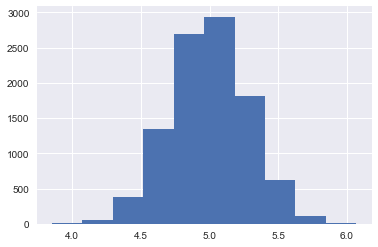

In [55]:
#your code here
norm_rv = stats.norm(5,2)
var=[]
mean=[]
for i in range(10000):
    sample=norm_rv.rvs(50)
    mean.append(sample.mean())
plt.hist(mean)
print("Выборочное среднее равно: {}, что соответствует теоритическому 5".format(np.array(mean).mean()))
print("Выборочная дисперсия равна: {}, что соответсвует se^2=(SD)^2/n={} ".format(np.array(mean).var(),4/50))

$\bar{X}$ имеет нормально распределение со средним выборки  близким ко среднему выборки (5). 

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

(array([  180.,  1752.,  3680.,  3020.,  1107.,   231.,    25.,     5.]),
 array([ 2.4451713 ,  2.63661147,  2.82805164,  3.0194918 ,  3.21093197,
         3.40237214,  3.59381231,  3.78525248,  3.97669265]),
 <a list of 8 Patch objects>)

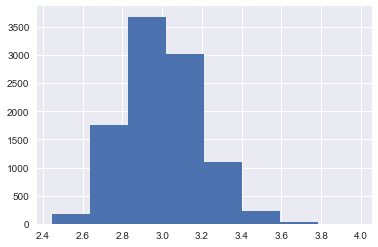

In [84]:
#your code here
#your code here
norm_rv = stats.expon(2)
var=[]
mean=[]
for i in range(10000):
    sample = norm_rv.rvs(27)
    #your code here
    mean.append(sample.mean())
plt.hist(mean,bins=8)

Достаточно изменить тип распределения выборки и небольшое кол-во значений при выборках из первой выборки. Но с увеличением этого числа, распределение станет нормальным.

- Сделайте z-преобразование для данного распределения

In [86]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(1000)
print("Initial var {} Initial mean {}".format(sample.var(),sample.mean()))
new_rvs=(sample-sample.mean())/math.sqrt(sample.var())

print("After Z-transform var {}  mean {}".format(new_rvs.var(),new_rvs.mean()))

Initial var 0.9012036417794205 Initial mean 3.975268574184581
After Z-transform var 1.0000000000000002  mean 7.815970093361102e-17


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [92]:
#your code here
t_rv=stats.t(15)
sample = t_rv.rvs(10000)
se=np.array(sample).var()/math.sqrt(10000)
print("90% ",-t_rv.ppf(.95),t_rv.ppf(.95))
print("95%",-t_rv.ppf(.975),t_rv.ppf(.975))

90%  -1.75305035569 1.75305035569
95% -2.13144954556 2.13144954556


Доверительный интервал доверия шире 95%, т.к. содержит 95% значений выборки

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [107]:
norm_rv = stats.norm(0, 2)
#your code here
x1=norm_rv.rvs(5000)
x2=norm_rv.rvs(10000)

se1=math.sqrt(x1.var())/math.sqrt(5000)
se2=math.sqrt(x2.var())/math.sqrt(10000)


print("CI for x1={}+-{}".format(x1.mean(),norm_rv.ppf(.95)*se1))

print("CI for x2={}+-{}".format(x2.mean(),norm_rv.ppf(.95)*se2))

CI for x1=0.01973459274470859+-0.09487749692243666
CI for x2=0.0030450452732263505+-0.06533412708331957


ДИ в выборке с большим количестовм значений будет уже, т.к. средняя квдаратичная ошибка будем меньше.